In [1]:
import numpy as np
import pandas as pd

#Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVC


url = 'https://raw.githubusercontent.com/HeedfulMoss/ECGR_4105_Intro_ML/main/Homework/Homework_3/cancer.csv'
df = pd.read_csv(url)
breast_set = load_breast_cancer()
#df.head()

Pre-Processing

In [2]:
dataset = df.drop('id',  axis=1)
diagnosis = dataset.pop('diagnosis')
dataset.insert(30,'label',diagnosis)

dataset.columns = np.append(breast_set.feature_names, 'diagnosis')
dataset['diagnosis'].replace('B', 0, inplace=True)
dataset['diagnosis'].replace('M', 1, inplace=True)

np.random.seed(0)

X = dataset.iloc[:,:30].values

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x = sc_X.fit_transform(X)
y = dataset.iloc[:, 30].values

<ipython-input-2-89bc636f6282>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['diagnosis'].replace('B', 0, inplace=True)
<ipython-input-2-89bc636f6282>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Principle Component Analysis and SVM Classification



In [3]:
def svm_train(x, y, kern, K):
  accuracies = []
  precisions = []
  recalls = []

  for N in K:
    pca = PCA(n_components=N)
    principalDf = pd.DataFrame(pca.fit_transform(x))
    newX = principalDf.values

    x_train, x_test, y_train, y_test = train_test_split(newX, y, train_size=0.8, test_size=0.2, random_state=0)

    classifier = SVC(kernel=kern, C=1)
    classifier.fit(x_train, y_train)

    y_pred = classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

  return accuracies, precisions, recalls


Linear Kernal Accuracy and Ploting

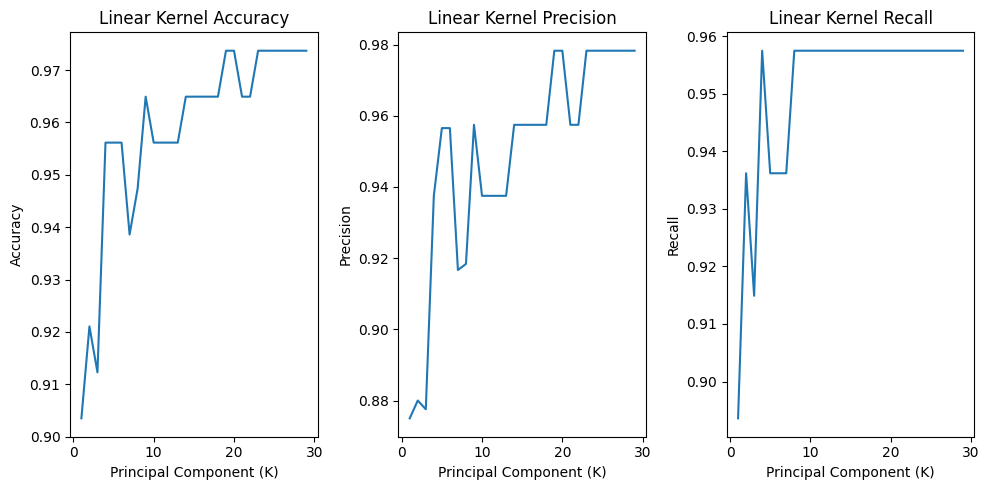

In [4]:
k = range(1, 30)
accuracy, precision, recall = svm_train(x, y, 'linear', k)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, accuracy)
plt.title('Linear Kernel Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(k, precision)
plt.title('Linear Kernel Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(k, recall)
plt.title('Linear Kernel Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

RBF Kernal Accuracy and Plot



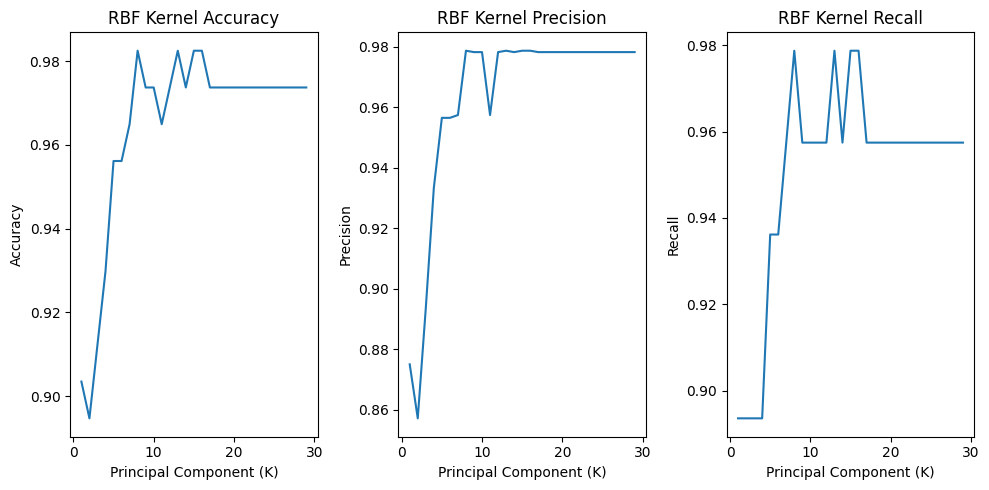

In [5]:
k = range(1, 30)
accuracy, precision, recall = svm_train(x, y, 'rbf', k)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, accuracy)
plt.title('RBF Kernel Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(k, precision)
plt.title('RBF Kernel Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(k, recall)
plt.title('RBF Kernel Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

Poly Kernal Accuracy and Plotting



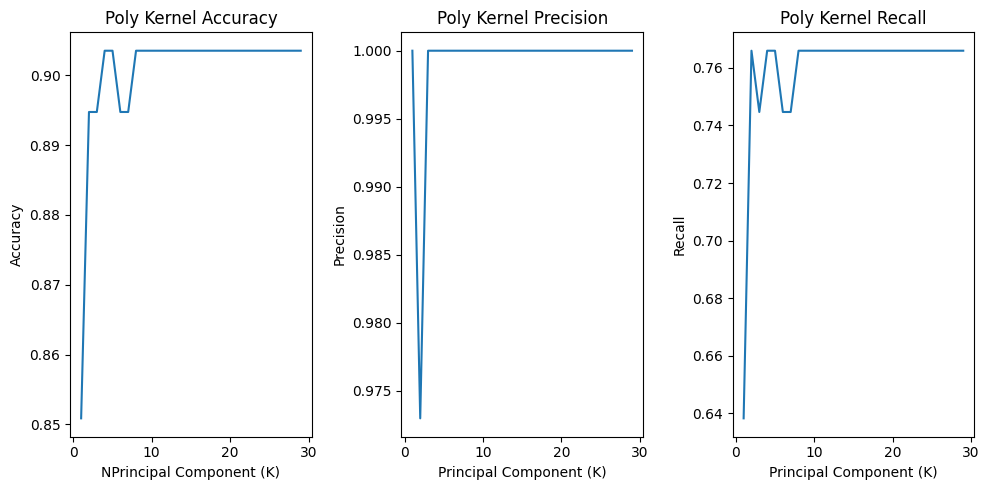

In [6]:
k = range(1, 30)
accuracy, precision, recall = svm_train(x, y, 'poly', k)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(k, accuracy)
plt.title('Poly Kernel Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(k, precision)
plt.title('Poly Kernel Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

plt.subplot(1, 3, 3)
plt.plot(k, recall)
plt.title('Poly Kernel Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()